Robust MPC: Simulation with linearized rocket system

In [58]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from LandMPC_deliverable_6_1.MPCControl_z import MPCControl_z
from src.rocket import Rocket
from src.pos_rocket_vis import *

# Require ipympl
%matplotlib widget 

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 20  # simulation length in seconds
x0 = np.zeros(12)
x0[11] = 10.0    # initial state

x_ref = np.array([0.]*9 + [1., 0., 3.]) # reference state
xs, us = rocket.trim(x_ref)


print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
sys = rocket.linearize_sys(xs, us)
A, B = sys.A, sys.B


H = 7
mpc = MPCControl_z(A, B, xs, us, Ts, H)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [60]:
print("=== TRIM CHECK ===")
print("xs (last 3 states):", xs[-3:])   # [x, y, z]
print("z_s =", xs[11])
print("us =", us)


=== TRIM CHECK ===
xs (last 3 states): [1. 0. 3.]
z_s = 3.0
us = [ 0.          0.         56.66666667  0.        ]


In [61]:
print("\n=== INITIAL STATE CHECK ===")
print("x0 z (absolute) =", x0[11])
print("Δz0 =", x0[11] - xs[11])



=== INITIAL STATE CHECK ===
x0 z (absolute) = 10.0
Δz0 = 7.0


In [62]:
print("\n=== FINAL STATE CHECK ===")
print("final z (absolute) =", x_cl[11, -1])
print("final Δz =", x_cl[11, -1] - xs[11])


=== FINAL STATE CHECK ===
final z (absolute) = 2.773812053314846
final Δz = -0.22618794668515418


In [63]:
print("\n=== PLOTTING CHECK ===")
print("Are we plotting absolute z or delta z?")
print("Example values:")
print("z absolute first/last:", x_cl[11, 0], x_cl[11, -1])
print("z delta first/last:", x_cl[11, 0] - xs[11], x_cl[11, -1] - xs[11])



=== PLOTTING CHECK ===
Are we plotting absolute z or delta z?
Example values:
z absolute first/last: 10.0 2.773812053314846
z delta first/last: 7.0 -0.22618794668515418



=== MPC Z STEP DEBUG ===
dx0 = [0. 7.]  (Δz0= 7.0 )
status = optimal
dv0 = -54.28346497178498  -> u_abs = 2.383201699374773

=== MPC Z STEP DEBUG ===
dx0 = [-0.21683913  6.99457902]  (Δz0= 6.9945790218574295 )
status = optimal
dv0 = -54.28342142144662  -> u_abs = 2.3832452497131342

=== MPC Z STEP DEBUG ===
dx0 = [-0.42071556  6.97864015]  (Δz0= 6.97864015472889 )
status = optimal
dv0 = -54.283407599705505  -> u_abs = 2.3832590714542476

=== MPC Z STEP DEBUG ===
dx0 = [-0.59525005  6.95324101]  (Δz0= 6.953241014574941 )
status = optimal
dv0 = -54.28341063541066  -> u_abs = 2.383256035749092

=== MPC Z STEP DEBUG ===
dx0 = [-0.78161023  6.91881951]  (Δz0= 6.918819507584125 )
status = optimal
dv0 = -54.28341157201264  -> u_abs = 2.3832550991471138

=== MPC Z STEP DEBUG ===
dx0 = [-0.95796609  6.8753301 ]  (Δz0= 6.875330099399767 )
status = optimal
dv0 = -54.28341126998063  -> u_abs = 2.3832554011791203

=== MPC Z STEP DEBUG ===
dx0 = [-1.13337456  6.82304658]  (Δz0= 6.823046583102306 )


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

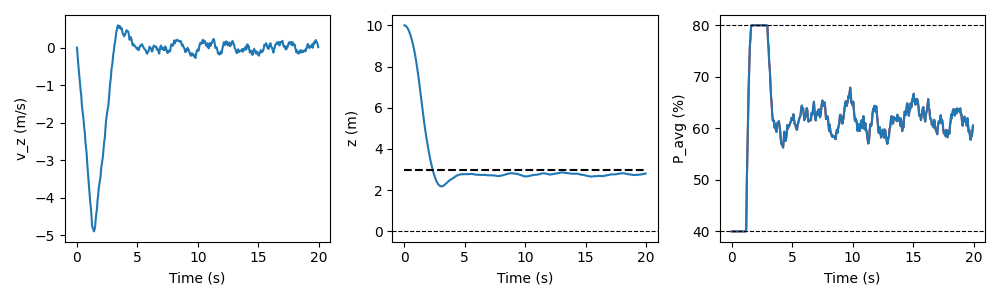

In [64]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

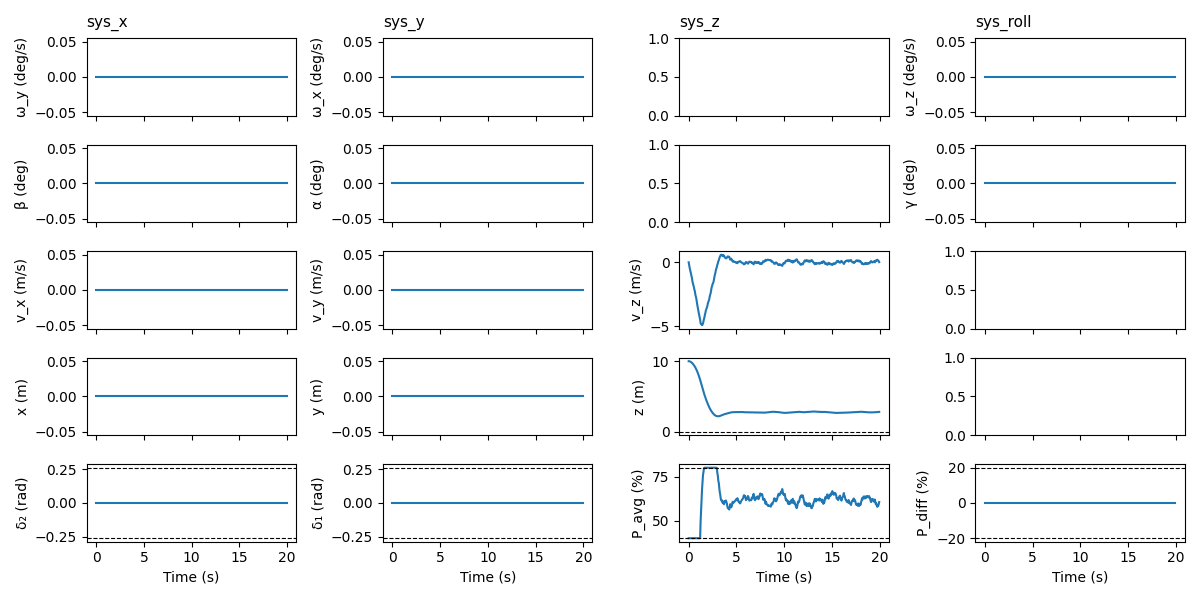

In [65]:
plot_static_states_inputs(
    T=t_cl[:-1],      # time for inputs
    X=x_cl[:, :-1],   # match the same length
    U=u_cl,           # DON'T slice
    Ref=None,
    type="vel"
)

In [66]:
print("\n=== MPC Z DEBUG (tightening) ===")
print("xs_z =", mpc.xs)         # [vz_s, z_s]
print("us_z =", mpc.us)         # [Pavg_s]
print("E_lb =", mpc.E_lb)
print("E_ub =", mpc.E_ub)
print("z_min_tight (delta z) =", mpc.z_min_tight)
print("v_min_tight, v_max_tight =", mpc.v_min_tight, mpc.v_max_tight)
print("U_tight_vertices (abs) =", mpc.U_tight_vertices)



=== MPC Z DEBUG (tightening) ===
xs_z = [0. 3.]
us_z = [56.66666667]
E_lb = [-1.28231015 -0.73349819]
E_ub = [1.28231015 0.73349819]
z_min_tight (delta z) = -2.2465018072090515
v_min_tight, v_max_tight = -54.283441644422695 60.95010830210319
U_tight_vertices (abs) = [  2.38322503 117.61677497]


In [67]:
print("E_lb, E_ub =", mpc.E_lb, mpc.E_ub)  # [e_vz, e_z]

E_lb, E_ub = [-1.28231015 -0.73349819] [1.28231015 0.73349819]


In [68]:
""" print("us =", float(mpc.us))
print("v_tight =", mpc.v_min_tight, mpc.v_max_tight)
print("U_tight_vertices (absolute) =", mpc.U_tight_vertices) """


' print("us =", float(mpc.us))\nprint("v_tight =", mpc.v_min_tight, mpc.v_max_tight)\nprint("U_tight_vertices (absolute) =", mpc.U_tight_vertices) '

In [69]:
# the matrices you pass in (from sys)
print("A_in eig:", np.linalg.eigvals(A[np.ix_(mpc.x_ids, mpc.x_ids)]))
print("B_in sub:", B[np.ix_(mpc.x_ids, mpc.u_ids)].flatten())

# the matrices inside the controller after MPCControl_base processed them
print("A_mpc:", mpc.A)
print("B_mpc:", mpc.B.flatten())


A_in eig: [0. 0.]
B_in sub: [0.17304706 0.        ]
A_mpc: [[1.   0.  ]
 [0.05 1.  ]]
B_mpc: [0.00865235 0.00021631]


In [70]:
print("Acl_err used should be:\n", mpc.A + mpc.B @ mpc._K_tube)
print("E_lb/E_ub:", mpc.E_lb, mpc.E_ub)

w_abs = 15
Bw_abs = np.abs(mpc.B.flatten()) * w_abs
print("Bw_abs:", Bw_abs)



Acl_err used should be:
 [[ 0.85196736 -0.1849355 ]
 [ 0.04629918  0.99537661]]
E_lb/E_ub: [-1.28231015 -0.73349819] [1.28231015 0.73349819]
Bw_abs: [0.12978529 0.00324463]



=== MPC Z STEP DEBUG ===
dx0 = [0. 7.]  (Δz0= 7.0 )
status = optimal
dv0 = -54.28347722767491  -> u_abs = 2.383189443484845

=== MPC Z STEP DEBUG ===
dx0 = [-0.14420588  6.99639485]  (Δz0= 6.996394852940204 )
status = optimal
dv0 = -54.28340691518945  -> u_abs = 2.3832597559703004

=== MPC Z STEP DEBUG ===
dx0 = [-0.28841176  6.98557941]  (Δz0= 6.985579411760817 )
status = optimal
dv0 = -54.28340865106044  -> u_abs = 2.383258020099312

=== MPC Z STEP DEBUG ===
dx0 = [-0.43261765  6.96755368]  (Δz0= 6.96755367646184 )
status = optimal
dv0 = -54.28340673149697  -> u_abs = 2.3832599396627856

=== MPC Z STEP DEBUG ===
dx0 = [-0.57682353  6.94231765]  (Δz0= 6.9423176470432715 )
status = optimal
dv0 = -54.28340915913051  -> u_abs = 2.383257512029246

=== MPC Z STEP DEBUG ===
dx0 = [-0.72102941  6.90987132]  (Δz0= 6.9098713235051115 )
status = optimal
dv0 = -54.28340886743238  -> u_abs = 2.383257803727375

=== MPC Z STEP DEBUG ===
dx0 = [-0.86523529  6.87021471]  (Δz0= 6.870214705847362 )
st

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

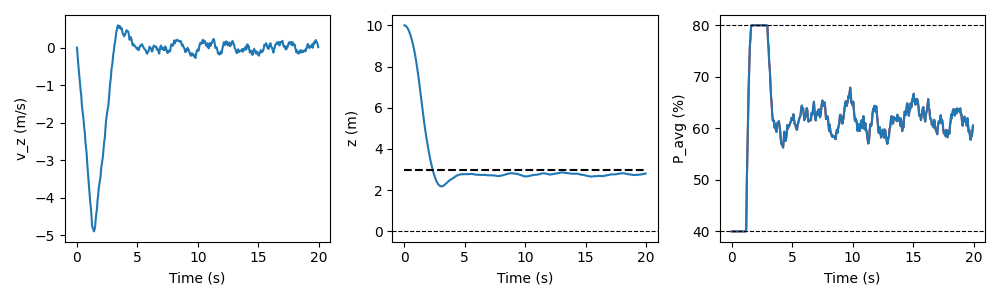

In [71]:
t, x, u = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='no_noise')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')


In [73]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')


=== MPC Z STEP DEBUG ===
dx0 = [0. 7.]  (Δz0= 7.0 )
status = optimal
dv0 = -54.28347687513443  -> u_abs = 2.38318979602532

=== MPC Z STEP DEBUG ===
dx0 = [-0.27399118  6.99315022]  (Δz0= 6.993150220587264 )
status = optimal
dv0 = -54.28340778240836  -> u_abs = 2.383258888751392

=== MPC Z STEP DEBUG ===
dx0 = [-0.54798235  6.97260088]  (Δz0= 6.972600882349054 )
status = optimal
dv0 = -54.28340725851286  -> u_abs = 2.3832594126468933

=== MPC Z STEP DEBUG ===
dx0 = [-0.82197353  6.93835199]  (Δz0= 6.938351985285371 )
status = optimal
dv0 = -54.283406572171046  -> u_abs = 2.383260098988707

=== MPC Z STEP DEBUG ===
dx0 = [-1.09596471  6.89040353]  (Δz0= 6.890403529396213 )
status = optimal
dv0 = -54.28340744153072  -> u_abs = 2.383259229629033

=== MPC Z STEP DEBUG ===
dx0 = [-1.36995588  6.82875551]  (Δz0= 6.828755514681584 )
status = optimal
dv0 = -54.28340940757461  -> u_abs = 2.3832572635851434

=== MPC Z STEP DEBUG ===
dx0 = [-1.64394706  6.75340794]  (Δz0= 6.7534079411414805 )
st

ValueError: Constraints violation detected, terminating...

In [ ]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

State violation: [vz,z]=[-2.75555636 -0.00759044], [LBX, UBX]=(array([-inf,   0.]), array([inf, inf]))


ValueError: Constraints violation detected, terminating...